In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve, nsolve, latex
from sympy.utilities.lambdify import lambdify
from scipy.spatial.transform import Rotation as R
from scipy.integrate import trapezoid
from skspatial.measurement import area_signed


sys.path.append('../model/')
from area import Model

In [2]:
np.seterr(invalid='ignore') # Ignore sqrt(nan)

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [3]:
m = Model(theta=15, x0=2.0, y0=0.0, z0=10.0, r=2.2, i=7.4, mask_z=False)  # Grazing
m2 = Model(theta=15, x0=2.0, y0=0.0, z0=10.0, r=2.2, i=7.4, mask_z=True)  # Grazing
#m2 = Model(theta=7.5, x0=3.0, y0=0.0, z0=10.0, r=2.2, i=7.4, mask_z=True)  # Grazing
m3 = Model(theta=15, x0=0.1, y0=0.0, z0=10.0, r=2.2, i=10.0, mask_z=True) # Full intersection
m4 = Model(theta=15, x0=0.1, y0=0.0, z0=10.0, r=0.2, i=12, mask_z=True)    # Inside Cone
m5 = Model(theta=15, x0=15, y0=15, z0=3, r=1.0, i =10, mask_z=True)       # Outside cone
models = [m, m2, m3, m4, m5]

n_idx=2 one segment, grazing?


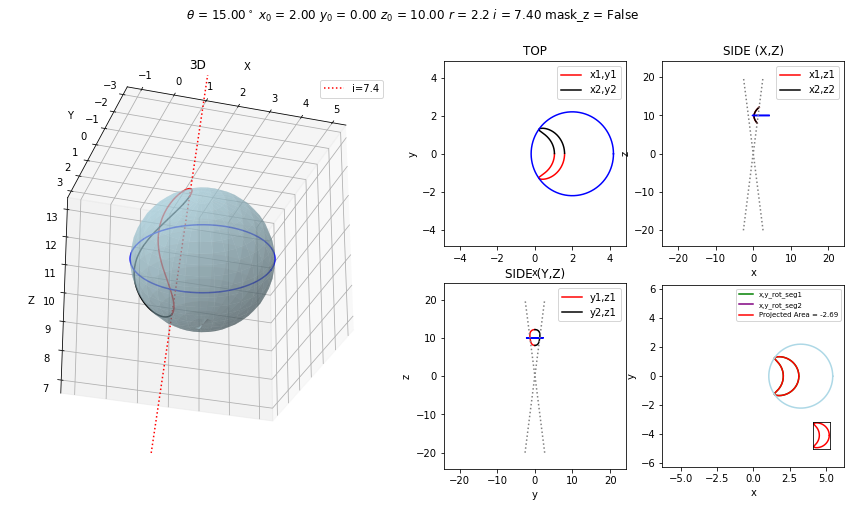

In [4]:
m.run()
m.plot()

n_idx=1 WARNING! n_idx == 1 curve may be outside of zrange... (if mask_z=False)


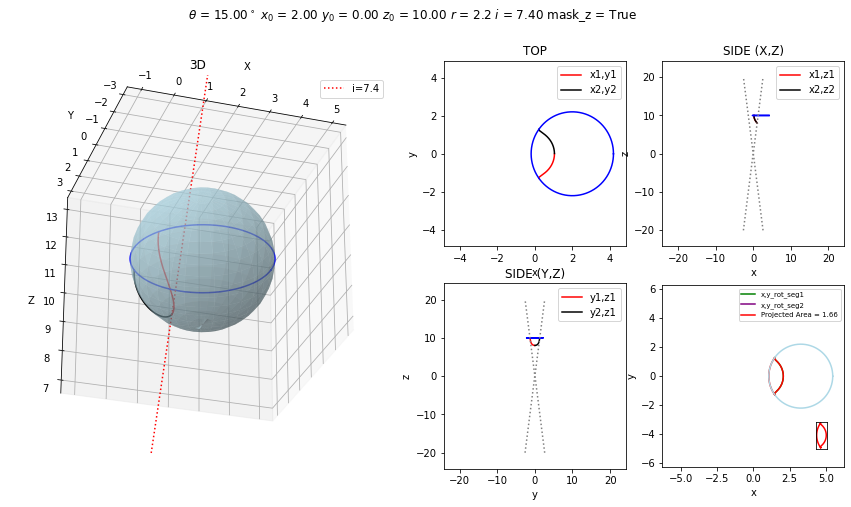

In [5]:
m2.run()
m2.plot()

n_idx=2 one segment, grazing?
n_idx=1 WARNING! n_idx == 1 curve may be outside of zrange... (if mask_z=False)
n_idx=1 WARNING! n_idx == 1 curve may be outside of zrange... (if mask_z=False)
n_idx=1 WARNING! n_idx == 1 curve may be outside of zrange... (if mask_z=False)
n_idx=1 WARNING! n_idx == 1 curve may be outside of zrange... (if mask_z=False)


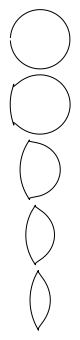

In [4]:
n = 5


fig, ax = plt.subplots(n,1,figsize=(6,6))
axes = ax.flatten()
for a in axes:
    a.set_aspect(1)
    
xs = np.linspace(0.5 , 2.5, n)

for i in range(n):
    x = xs[i]
    m = Model(theta=15, x0=x, y0=0.0, z0=10.0, r=2.2, i=0.0, mask_z=True)
    m.run()
    axes[i].plot(m.x_rot_lens, m.y_rot_lens , color='black', lw=1.0) 
    axes[i].axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('../figures/irradiated_areas.pdf', bbox_inches='tight')

n_idx=2 one segment, grazing?
n_idx=1 WARNING! n_idx == 1 curve may be outside of zrange... (if mask_z=False)
n_idx=1 WARNING! n_idx == 1 curve may be outside of zrange... (if mask_z=False)
n_idx=1 WARNING! n_idx == 1 curve may be outside of zrange... (if mask_z=False)


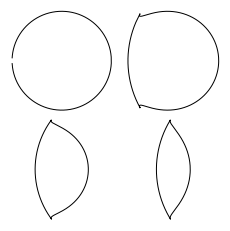

In [4]:
n = 4


fig, ax = plt.subplots(2,2,figsize=(4,4))
axes = ax.flatten()
for a in axes:
    a.set_aspect(1)
    
xs = np.linspace(0.5 , 2.5, n)

for i in range(n):
    x = xs[i]
    m = Model(theta=15, x0=x, y0=0.0, z0=10.0, r=2.2, i=0.0, mask_z=True)
    m.run()
    axes[i].plot(m.x_rot_lens, m.y_rot_lens , color='black', lw=1.0) 
    axes[i].axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('../figures/irradiated_areas_sq.pdf', bbox_inches='tight')

In [6]:
# Joining Grazing Angles

In [7]:
# Join x1 and x2
x_seg1 = np.concatenate([np.flip(m2.x1_seg1), m2.x2_seg1])
y_seg1 = np.concatenate([np.flip(m2.y1_seg1), m2.y2_seg1])

# Find endpoints
x_seg1_start, x_seg1_end  = x_seg1[0], x_seg1[-1]
y_seg1_start, y_seg1_end = y_seg1[0], y_seg1[-1]

In [8]:
# Get the length from the start to the end point
chord_length = (x_seg1_start - x_seg1_end)**2 + (y_seg1_start-y_seg1_end)**2

In [9]:
# Calculate the distance of each point on the circle to the start and end points
point_distances_start = np.sum(np.array([m2.x_circ - x_seg1_start, m2.y_circ - y_seg1_start])**2, axis=0)
point_distances_end   = np.sum(np.array([m2.x_circ - x_seg1_end, m2.y_circ - y_seg1_end])**2, axis=0)

In [10]:
# Get the idxs of the points on the circle that are closer distance from the start and ends
path_idx = ((point_distances_end < chord_length) & (point_distances_start < chord_length))

In [11]:
# Get the segment of the circle that satisfies the above condition
x_circ_segment = m2.x_circ[path_idx]
y_circ_segment = m2.y_circ[path_idx]

In [12]:
# Join the circle segment with the intersection segment to create the closed lens
x_lens = np.concatenate([x_seg1, x_circ_segment])
y_lens = np.concatenate([y_seg1, y_circ_segment])

In [13]:
# Calculate the area of the Lens
area_signed(np.array([x_lens,y_lens]).T)

2.1515824359304423

(-5.0, 5.0)

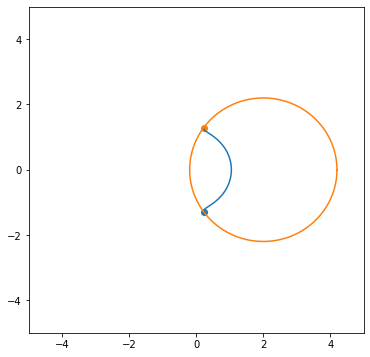

In [14]:
plt.figure(figsize=(6,6))
plt.plot(x_seg1, y_seg1)
plt.plot(m2.x_circ, m2.y_circ)
plt.scatter(x_seg1_start, y_seg1_start)
plt.scatter(x_seg1_end, y_seg1_end)

plt.xlim(-5,5)
plt.ylim(-5,5)

(-5.0, 5.0)

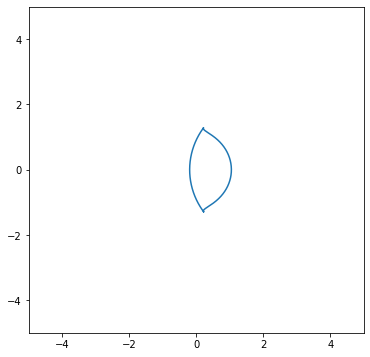

In [15]:
plt.figure(figsize=(6,6))
plt.plot(x_lens,y_lens)
plt.xlim(-5,5)
plt.ylim(-5,5)

n_idx=2 one segment, grazing?


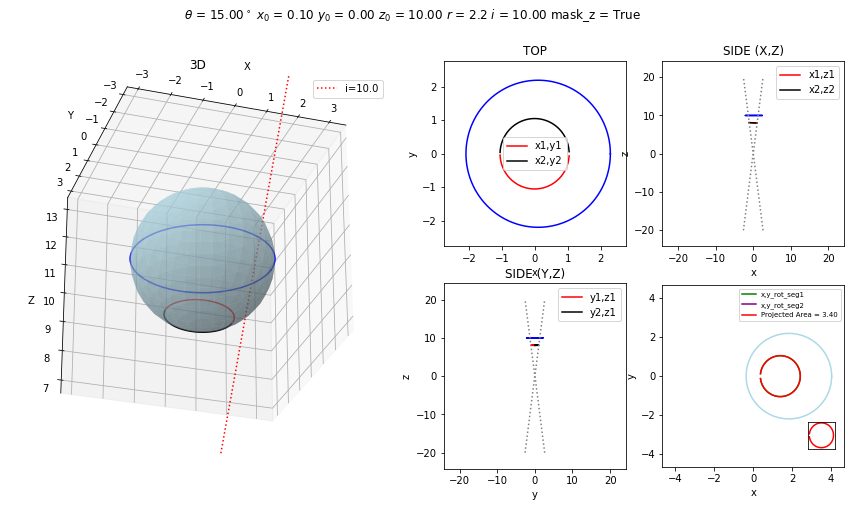

In [16]:
m3.run()
m3.plot()

In [17]:
m3.x1_seg1

array([ 1.0442,  1.0368,  1.0294, ..., -1.0399, -1.0468, -1.0537])

In [18]:
x_seg1 = np.concatenate([np.flip(m3.x1_seg1), m3.x2_seg1])
y_seg1 = np.concatenate([np.flip(m3.y1_seg1), m3.y2_seg1])

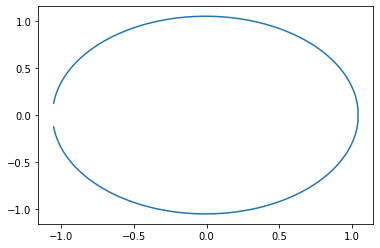

In [19]:
plt.plot(x_seg1, y_seg1)

In [58]:
import numpy as np

x_apex, y_apex, z_apex = 0.0, 0.0, 0.0
x_axis, y_axis, z_axis = 0.0, 0.0, 1.0
cone_angle_in_radians = 5 * np.pi/180

x_center, y_center, z_center = 0.0, 0.0, 20.0
sphere_radius = 10.0

# Define the cone parameters
cone_apex = np.array([x_apex, y_apex, z_apex])  # Cone apex position
cone_axis = np.array([x_axis, y_axis, z_axis])  # Cone axis direction
cone_angle = cone_angle_in_radians  # Cone angle in radians

# Define the sphere parameters
sphere_center = np.array([x_center, y_center, z_center])  # Sphere center position
sphere_radius = sphere_radius  # Sphere radius

# Calculate the vector from the cone apex to the sphere center
apex_to_center = sphere_center - cone_apex

# Calculate the dot product of the cone axis and the vector from the apex to the sphere center
dot_product = np.dot(cone_axis, apex_to_center)

# Calculate the height of the cone section that intersects the sphere
cone_height = sphere_radius / np.tan(cone_angle)

# Check if the cone and sphere intersect
print(dot_product, cone_height)
if dot_product >= 0 and dot_product <= cone_height:
    
    # Calculate the radius of the cone section at the intersection height
    cone_radius = dot_product * np.tan(cone_angle)

    # Calculate the vector from the cone apex to the intersection point
    apex_to_intersection = cone_axis * dot_product + cone_apex - sphere_center

    # Calculate the length of the vector from the intersection point to the edge of the cone section
    intersection_to_edge = np.sqrt(np.linalg.norm(apex_to_intersection)**2 - cone_radius**2)

    # Calculate the normalized vector from the intersection point to the edge of the cone section
    intersection_to_edge_norm = apex_to_intersection / np.linalg.norm(apex_to_intersection)
    intersection_to_edge_norm *= np.sign(np.dot(intersection_to_edge_norm, cone_axis))

    # Calculate the two intersection points between the cone and sphere
    intersection_points = [
        sphere_center + intersection_to_edge_norm * intersection_to_edge,
        sphere_center - intersection_to_edge_norm * intersection_to_edge
    ]
else:
    print('tomato')
    # The cone and sphere do not intersect
    intersection_points = []

20.0 114.30052302761342


/tmp/ipykernel_16446/537118892.py:39: RuntimeWarning: invalid value encountered in sqrt
  intersection_to_edge = np.sqrt(np.linalg.norm(apex_to_intersection)**2 - cone_radius**2)
/tmp/ipykernel_16446/537118892.py:42: RuntimeWarning: invalid value encountered in true_divide
  intersection_to_edge_norm = apex_to_intersection / np.linalg.norm(apex_to_intersection)


In [59]:
intersection_points

[array([nan, nan, nan]), array([nan, nan, nan])]

In [56]:
cone_height

114.30052302761342

In [60]:
import numpy as np
from scipy.optimize import fsolve

# Define the cone parameters
cone_apex = np.array([x_apex, y_apex, z_apex])  # Cone apex position
cone_axis = np.array([x_axis, y_axis, z_axis])  # Cone axis direction
cone_angle = cone_angle_in_radians  # Cone angle in radians

# Define the sphere parameters
sphere_center = np.array([x_center, y_center, z_center])  # Sphere center position
sphere_radius = sphere_radius  # Sphere radius

# Define a function that calculates the intersection point for a given angle
def intersection_point(angle):
    # Calculate the cone radius at this angle
    cone_radius = np.tan(cone_angle) * np.linalg.norm(cone_axis) * np.sin(angle)

    # Define a function that finds the intersection point for a given distance along the cone axis
    def intersection_func(distance):
        # Calculate the point on the cone at this distance along the axis
        cone_point = cone_apex + distance * cone_axis / np.linalg.norm(cone_axis)

        # Calculate the vector from the cone point to the sphere center
        vector_to_center = sphere_center - cone_point

        # Calculate the distance along the vector to the intersection point
        distance_to_intersection = np.sqrt(np.linalg.norm(vector_to_center)**2 - sphere_radius**2)

        # Calculate the intersection point
        intersection = cone_point + distance_to_intersection * cone_axis / np.linalg.norm(cone_axis)

        return np.linalg.norm(intersection - cone_apex) - cone_radius

    # Find the distance along the cone axis that gives the intersection point
    distance = fsolve(intersection_func, 0)[0]

    # Calculate the intersection point
    cone_point = cone_apex + distance * cone_axis / np.linalg.norm(cone_axis)
    vector_to_center = sphere_center - cone_point
    distance_to_intersection = np.sqrt(np.linalg.norm(vector_to_center)**2 - sphere_radius**2)
    intersection = cone_point + distance_to_intersection * cone_axis / np.linalg.norm(cone_axis)

    return intersection

# Define the number of points to sample
num_points = 100

# Sample the intersection curve
angles = np.linspace(0, 2*np.pi, num_points)
intersection_curve = np.array([intersection_point(angle) for angle in angles])

/tmp/ipykernel_16446/3492198721.py:27: RuntimeWarning: invalid value encountered in sqrt
  distance_to_intersection = np.sqrt(np.linalg.norm(vector_to_center)**2 - sphere_radius**2)
/home/x1/.pyenv/versions/3.10.4/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/home/x1/.pyenv/versions/3.10.4/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


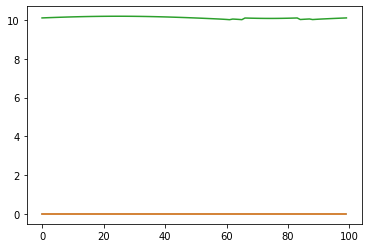

In [64]:
import matplotlib.pyplot as plt

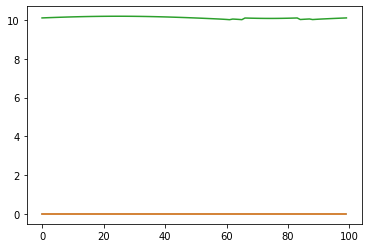

In [66]:
plt.plot(intersection_curve)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 3 and the array at index 1 has size 30

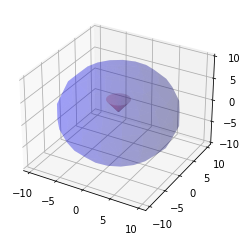

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the sphere and cone parameters as in the previous code block
r_sphere = 10

# Define the cone parameters
h_cone = 3.0  # Height of the cone
r_cone = 2.0  # Radius of the cone
npoints = 100  # Number of points to define the cone surface

# Create a linspace for the angle theta
theta = np.linspace(0, 2*np.pi, npoints)

# Create a linspace for the height z
z = np.linspace(0, h_cone, npoints)

# Create a meshgrid for theta and z
theta, z = np.meshgrid(theta, z)

# Compute the corresponding x and y coordinates
r = r_cone*(z/h_cone)
x_cone = r*np.cos(theta)
y_cone = r*np.sin(theta)
z_cone = z

# Create a 3D figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for the sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = r_sphere*np.sin(v)*np.cos(u)
y = r_sphere*np.sin(v)*np.sin(u)
z = r_sphere*np.cos(v)

# Plot the sphere and cone surfaces
ax.plot_surface(x, y, z, alpha=0.2, color='blue')
ax.plot_surface(x_cone, y_cone, z_cone, alpha=0.2, color='red')

# Set the axis limits to include the entire sphere and cone
min_coords = np.min(np.vstack((intersection_curve, np.column_stack((x, y, z)))), axis=0)
max_coords = np.max(np.vstack((intersection_curve, np.column_stack((x, y, z)))), axis=0)
ax.set_xlim(min_coords[0], max_coords[0])
ax.set_ylim(min_coords[1], max_coords[1])
ax.set_zlim(min_coords[2], max_coords[2])

# Set the axis labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Sphere and Cone Intersection')

# Show the plot
plt.show()